### Series de tiempo

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Correlacion

In [87]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


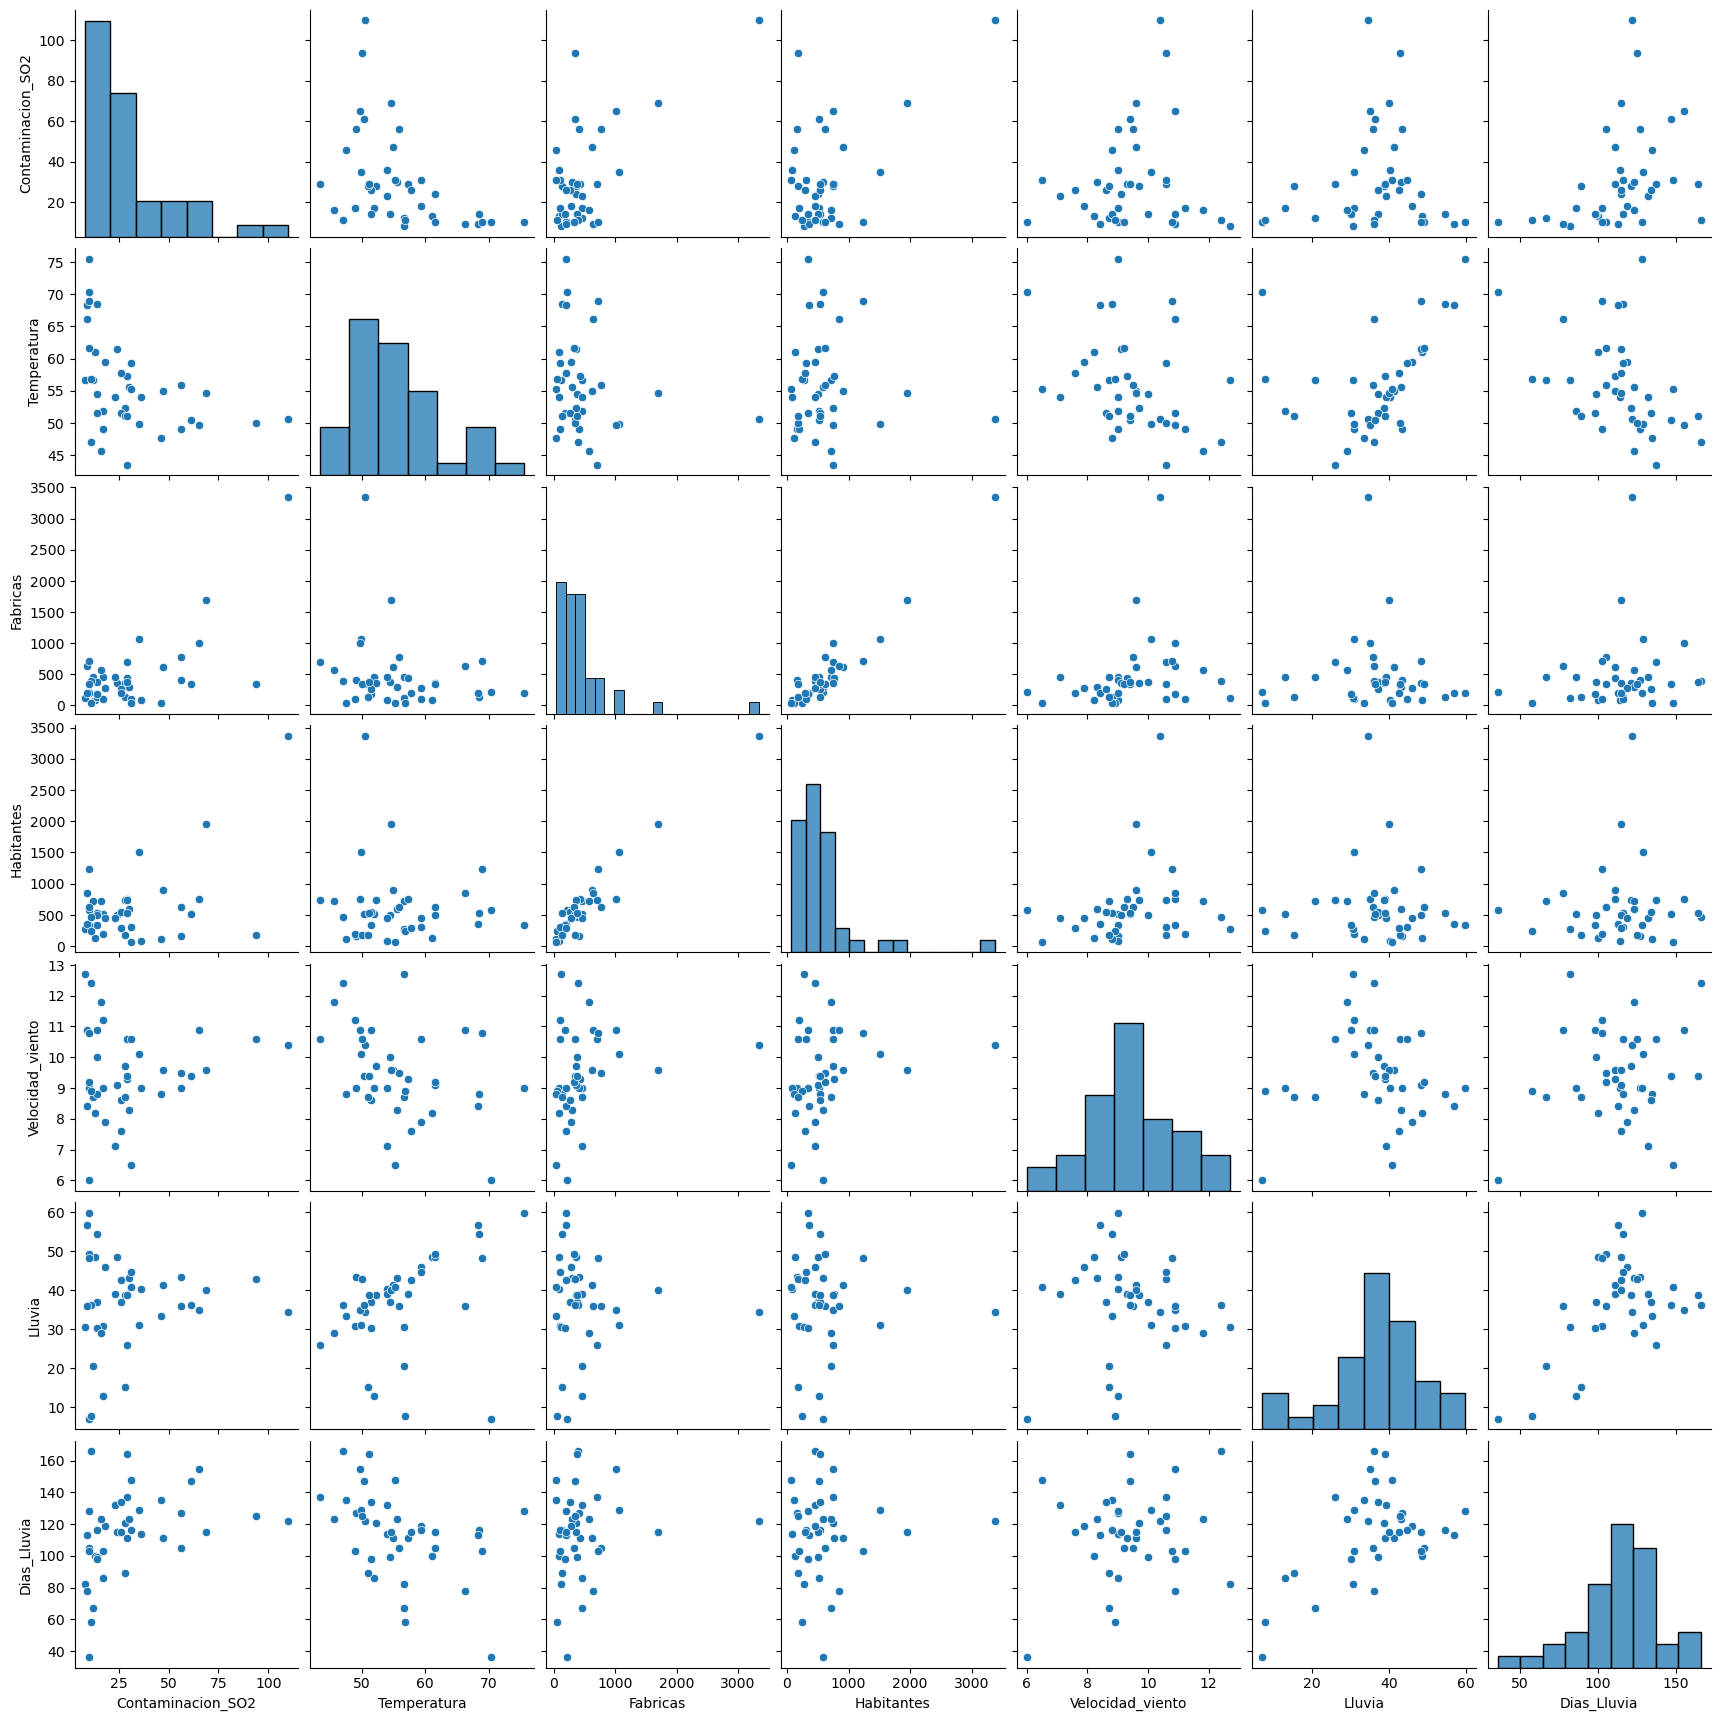

In [88]:
sns.pairplot(cont)
plt.show()

In [89]:
cont_corr = cont.corr()
cont_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.433600,0.644769,0.493780,0.094690,0.054294,0.369564
Temperatura,-0.433600,1.000000,-0.190042,-0.062678,-0.349740,0.386253,-0.430242
Fabricas,0.644769,-0.190042,1.000000,0.955269,0.237947,-0.032417,0.131829
Habitantes,0.493780,-0.062678,0.955269,1.000000,0.212644,-0.026119,0.042083
Velocidad_viento,0.094690,-0.349740,0.237947,0.212644,1.000000,-0.012994,0.164106
Lluvia,0.054294,0.386253,-0.032417,-0.026119,-0.012994,1.000000,0.496097
Dias_Lluvia,0.369564,-0.430242,0.131829,0.042083,0.164106,0.496097,1.000000


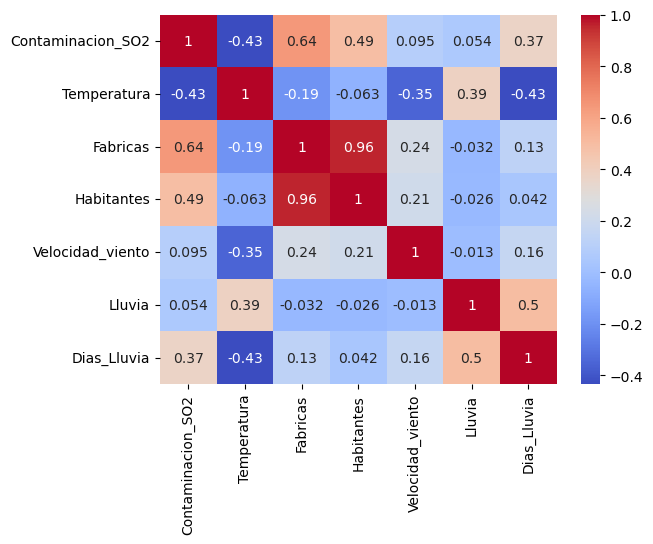

In [90]:
sns.heatmap(cont_corr, annot=True, cmap='coolwarm', xticklabels=cont_corr.columns, yticklabels=cont_corr.columns)
plt.show()

In [91]:
import pingouin as pg

In [92]:
# Revisar significancia estadística
corr = pg.pairwise_corr(cont, method='spearman')
# Ordenar los valores de acuerdo con 'p-unc' (significancia)
corr.sort_values(by=['p-unc'], ascending=True)[['X', 'Y', 'r', 'p-unc']]
# p-unc > 0.05 => no hay correlación significativa, posiblemente la correlacion se debe al azar

,X,Y,r,p-unc
11,Fabricas,Habitantes,0.822997,4.020507e-11
0,Contaminacion_SO2,Temperatura,-0.538831,2.784226e-04
5,Contaminacion_SO2,Dias_Lluvia,0.517709,5.270914e-04
10,Temperatura,Dias_Lluvia,-0.505730,7.434618e-04
9,Temperatura,Lluvia,0.498650,9.057623e-04
8,Temperatura,Velocidad_viento,-0.398282,9.906609e-03
12,Fabricas,Velocidad_viento,0.394193,1.076594e-02
15,Habitantes,Velocidad_viento,0.337431,3.096515e-02
1,Contaminacion_SO2,Fabricas,0.264051,9.527256e-02
18,Velocidad_viento,Lluvia,-0.256605,1.053381e-01


In [93]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
cur = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])
ads.head()

C:\Users\cemh0\AppData\Local\Temp\ipykernel_30416\3918855165.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cur = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])


,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [94]:
cur.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


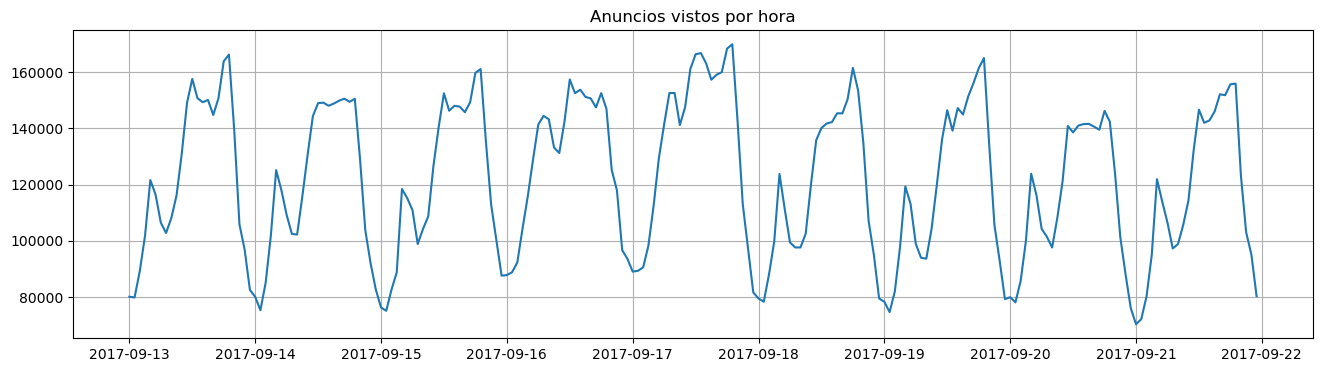

In [95]:
plt.figure(figsize=(16, 4))
plt.plot(ads.Ads)
plt.title('Anuncios vistos por hora')
plt.grid()
plt.show()

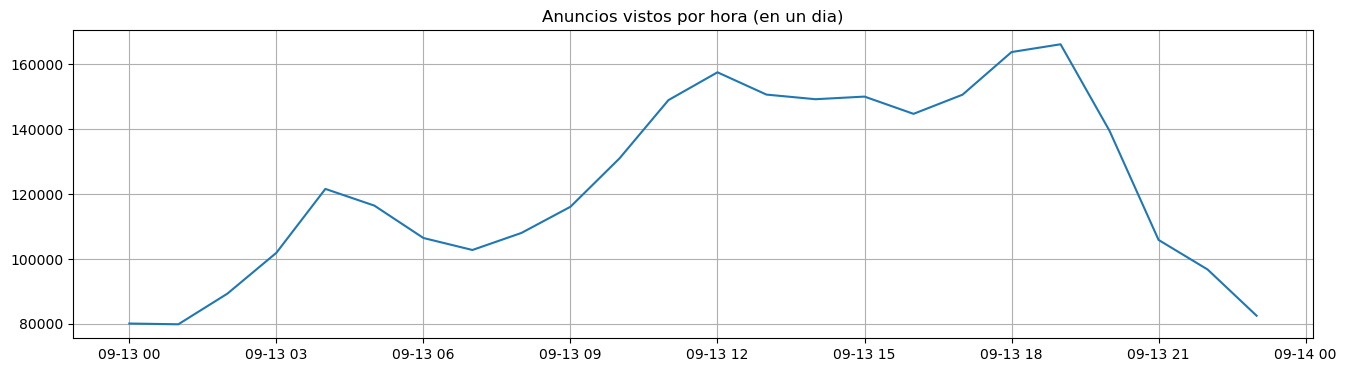

In [96]:
plt.figure(figsize=(16, 4))
plt.plot(ads.Ads.head(24))
plt.title('Anuncios vistos por hora (en un dia)')
plt.grid()
plt.show()

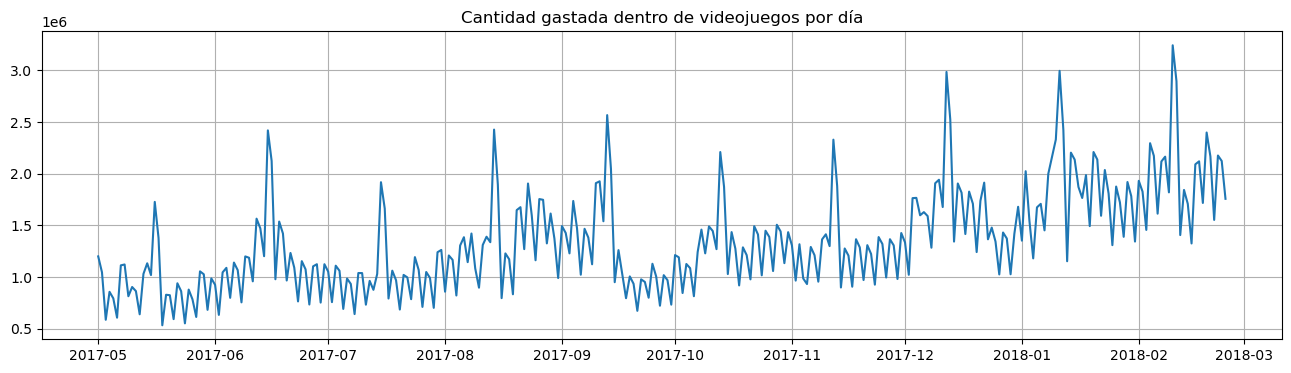

In [97]:
plt.figure(figsize=(16, 4))
plt.plot(cur.GEMS_GEMS_SPENT)
plt.grid()
plt.title('Cantidad gastada dentro de videojuegos por día')
plt.show()

AutoCorrelation function

In [98]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import scipy.stats as scs

In [99]:
data = sm.datasets.sunspots.load_pandas().data
data.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


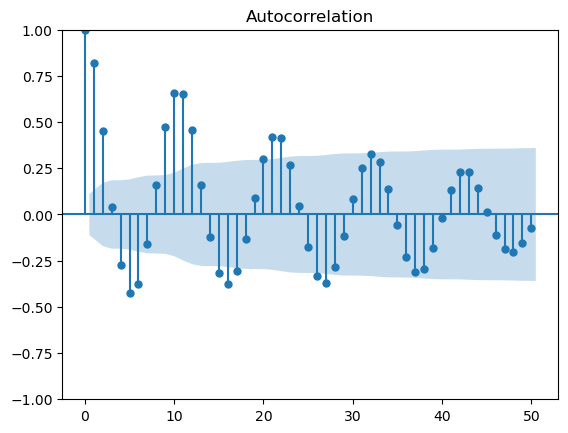

In [100]:
sm.graphics.tsa.plot_acf(data.SUNACTIVITY.values, lags=50)
plt.show()

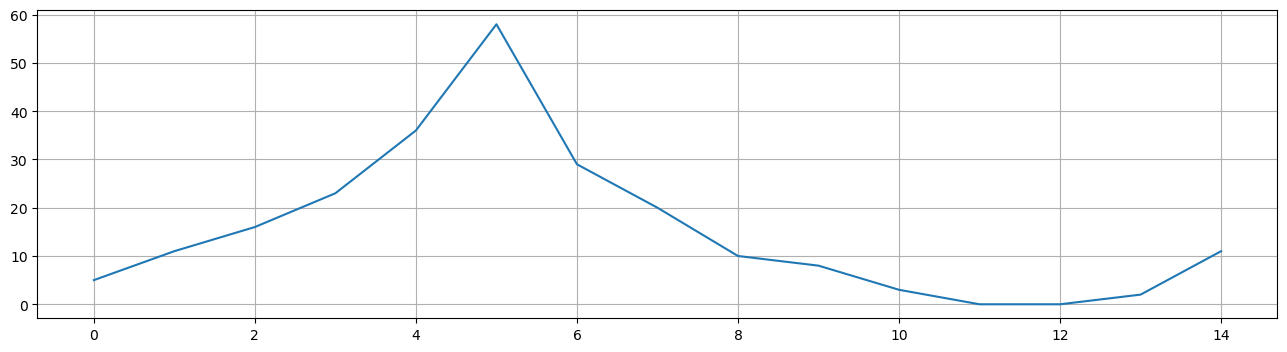

In [101]:
plt.figure(figsize=(16, 4))
data.SUNACTIVITY.head(15).plot()
plt.grid()
plt.show()

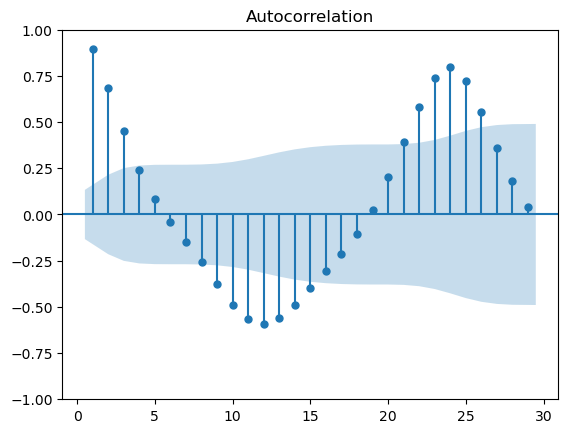

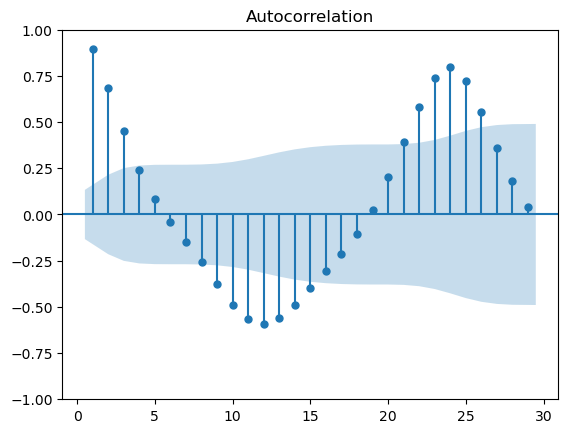

In [102]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ads.Ads, lags=range(1,30))

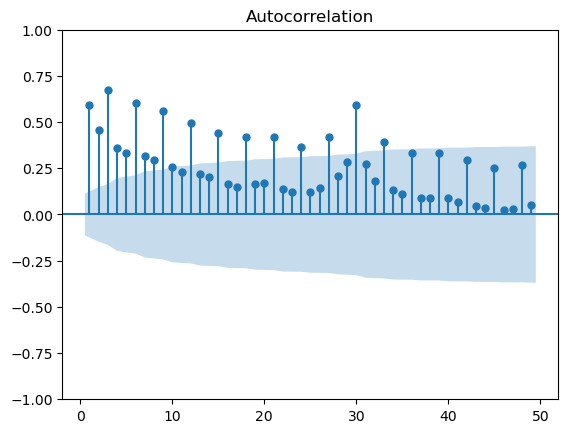

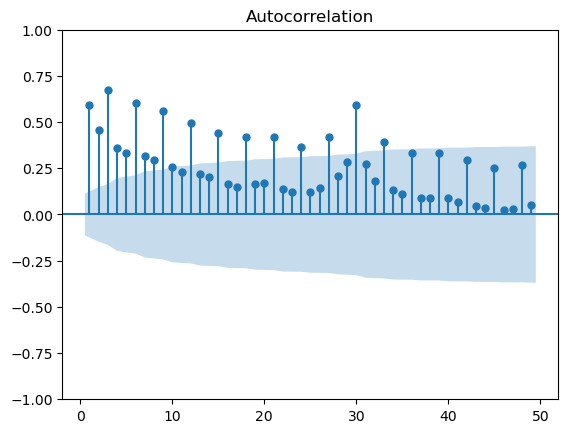

In [103]:
plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,50))

In [104]:
import numpy as np

In [105]:
# Media movil
def moving_average(series, n):
    """n es el tamano de la ventana"""
    return np.average(series[-n:])

In [106]:
moving_average(ads.Ads, 24)

116805.0

In [107]:
moving_average(cur.GEMS_GEMS_SPENT, 30)

1931348.8

In [111]:
# Metricas
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, scale=1.96, plot_intervals=False, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(16, 4))
    plt.title('Media movil\nTamano de la ventana = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Tendencia de media movil')

    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Intervalo de confianza')
        plt.plot(lower_bound, 'r--')

        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bound] = series[series < lower_bound]
            anomalies[series > upper_bound] = series[series > upper_bound]
            plt.plot(anomalies, 'ro', markersize=10)
    plt.plot(series[window:], 'r', label='Valores reales')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()
    
    mape = mean_absolute_percentage_error(series[window:], rolling_mean[window:])
    print('MAE =', mae)
    print('MAPE =', mape)

c:\Users\cemh0\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


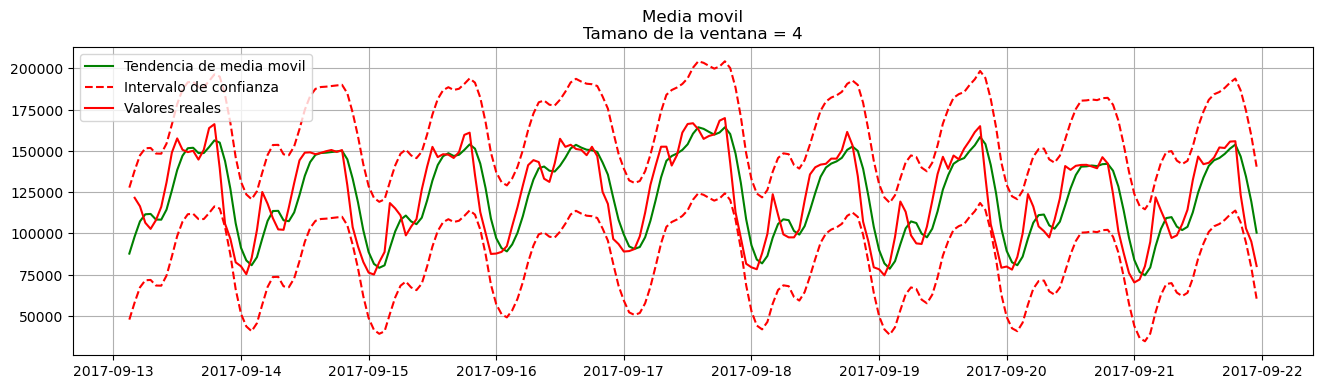

MAE = 11397.688679245282
MAPE = 10.240672665016465


In [112]:
plot_moving_average(ads, 4, plot_intervals=True, plot_anomalies=True)

c:\Users\cemh0\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


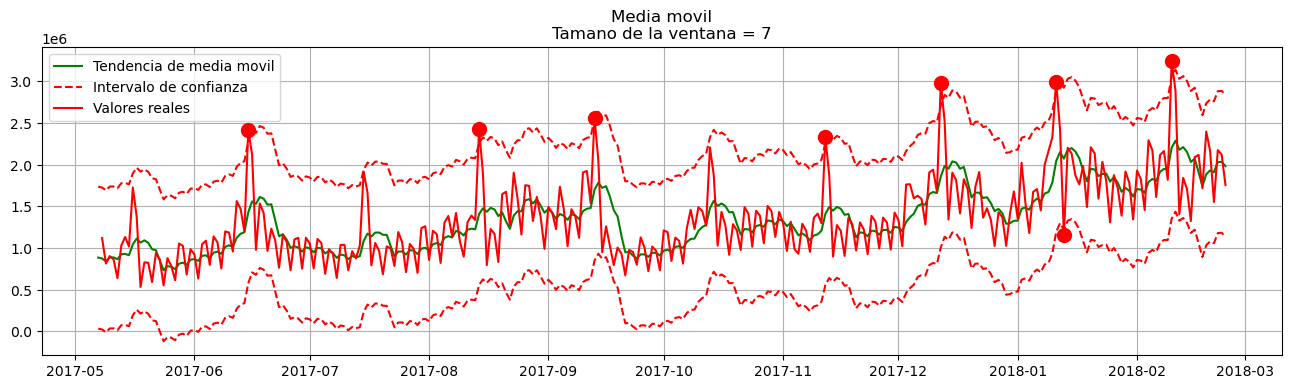

MAE = 236578.0672842516
MAPE = 18.400935365270296


In [114]:
plot_moving_average(cur, 7, plot_intervals=True, plot_anomalies=True)